In [26]:
import sys
import os
import pandas as pd
import json

In [27]:
with open('/Users/gkreder/Downloads/pubmedqa/data/ori_pqaa.json', 'r') as f:
    data = json.load(f)
unique_meshes = set([item for sublist in [v['MESHES'] for k, v in data.items() if v['MESHES']] for item in sublist])
with open('unique_meshes_automatic.json', 'w') as f:
    json.dump(list(unique_meshes), f)

In [28]:
with open('/Users/gkreder/Downloads/pubmedqa/data/ori_pqal.json', 'r') as f:
    data_labeled = json.load(f)
unique_meshes_labeled = set([item for sublist in [v['MESHES'] for k, v in data_labeled.items() if v['MESHES']] for item in sublist])
with open('unique_meshes_labeled.json', 'w') as f:
    json.dump(list(unique_meshes_labeled), f)

In [29]:
keywords = ['In Vitro Techniques']
keyword_studies = {k : v for k,v in data_labeled.items() if set([x for x in v['MESHES']]).intersection(set(keywords))}
with open('keyword_studies.json', 'w') as f:
    json.dump(keyword_studies, f)
print(keyword_studies)

{'24622801': {'QUESTION': 'Does implant coating with antibacterial-loaded hydrogel reduce bacterial colonization and biofilm formation in vitro?', 'CONTEXTS': ['Implant-related infections represent one of the most severe complications in orthopaedics. A fast-resorbable, antibacterial-loaded hydrogel may reduce or prevent bacterial colonization and biofilm formation of implanted biomaterials.QUESTIONS/', 'We asked: (1) Is a fast-resorbable hydrogel able to deliver antibacterial compounds in vitro? (2) Can a hydrogel (alone or antibacterial-loaded) coating on implants reduce bacterial colonization? And (3) is intraoperative coating feasible and resistant to press-fit implant insertion?', 'We tested the ability of Disposable Antibacterial Coating (DAC) hydrogel (Novagenit Srl, Mezzolombardo, Italy) to deliver antibacterial agents using spectrophotometry and a microbiologic assay. Antibacterial and antibiofilm activity were determined by broth microdilution and a crystal violet assay, resp

2017 1989


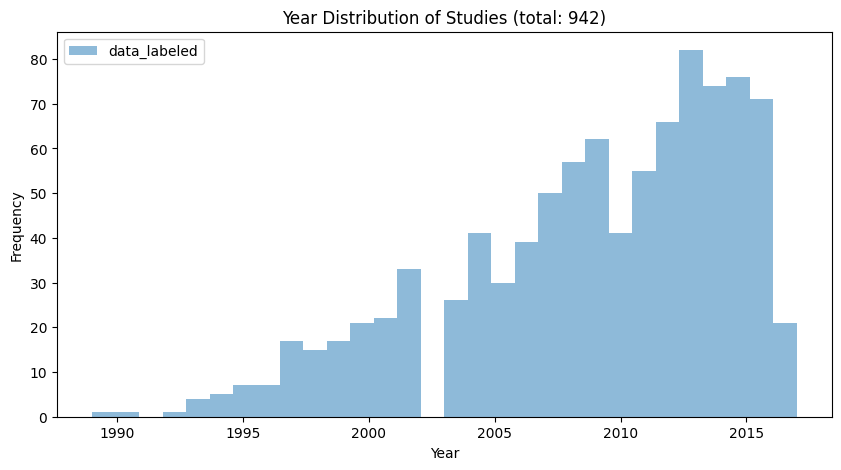

In [52]:
import matplotlib.pyplot as plt
# years = [int(v['YEAR']) for k,v in data.items() if 'YEAR' in v.keys() and v['YEAR']] # The automatic data doesn't have year labels
years_labeled = [int(v['YEAR']) for k,v in data_labeled.items() if v['YEAR']]
print(max(years_labeled), min(years_labeled))
# print(max(years), max(years_labeled), min(years), min(years_labeled))

plt.figure(figsize=(10, 5))
# plt.hist(years, bins=30, alpha=0.5, label='data', density=True, range=(min(years), max(years)))
plt.hist(years_labeled, bins=30, alpha=0.5, label='data_labeled', density=False, range=(min(years_labeled), max(years_labeled)))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title(f'Year Distribution of Studies (total: {len(years_labeled)})')
plt.legend()
plt.savefig('/Users/gkreder/Downloads/pubmedqa-labeled-year-distribution.svg')
plt.show()



In [44]:
data_labeled_2010 = {k: v for k, v in data_labeled.items() if (('YEAR' in v.keys()) and (v['YEAR']) and (int(v['YEAR']) >= 2010))}
print(len(data_labeled_2010))

486


In [45]:
with open('data_labeled_2010.json', 'w') as f:
    json.dump(data_labeled_2010, f)

In [49]:
unique_meshes_labeled_2010 = set([item for sublist in [v['MESHES'] for k, v in data_labeled_2010.items() if v['MESHES']] for item in sublist])
print(len(unique_meshes_labeled_2010))
with open('unique_meshes_labeled_2010.json', 'w') as f:
    json.dump(list(unique_meshes_labeled_2010), f)


2161


In [50]:
keywords = ['Cell Line']
keyword_studies = {k : v for k,v in data_labeled_2010.items() if set([x for x in v['MESHES']]).intersection(set(keywords))}
print(len(keyword_studies))

2


In [51]:
keyword_studies

{'26867834': {'QUESTION': 'Is Alveolar Macrophage Phagocytic Dysfunction in Children With Protracted Bacterial Bronchitis a Forerunner to Bronchiectasis?',
  'CONTEXTS': ['Children with recurrent protracted bacterial bronchitis (PBB) and bronchiectasis share common features, and PBB is likely a forerunner to bronchiectasis. Both diseases are associated with neutrophilic inflammation and frequent isolation of potentially pathogenic microorganisms, including nontypeable Haemophilus influenzae (NTHi), from the lower airway. Defective alveolar macrophage phagocytosis of apoptotic bronchial epithelial cells (efferocytosis), as found in other chronic lung diseases, may also contribute to tissue damage and neutrophil persistence. Thus, in children with bronchiectasis or PBB and in control subjects, we quantified the phagocytosis of airway apoptotic cells and NTHi by alveolar macrophages and related the phagocytic capacity to clinical and airway inflammation.',
   'Children with bronchiectasis